Para esta actividad voy a utilizar un dataset que contiene el precio de distintas casas en King County USA, y distintos datos sobre cada una. El dataset fue descargado
de aquí: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [40]:
#Importando librerias y configurando parametros de matplotlib
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"]=(16,9)
plt.style.use("ggplot")

In [41]:
#Importando dataset
df = pd.read_csv('../data/kc_house_data.csv')

#Eliminando columna que no son utiles
df.drop(['id', 'date'], axis=1, inplace=True)

df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [42]:
#Viendo los tipos de dato de cada columna y que no haya datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

KeyboardInterrupt: 

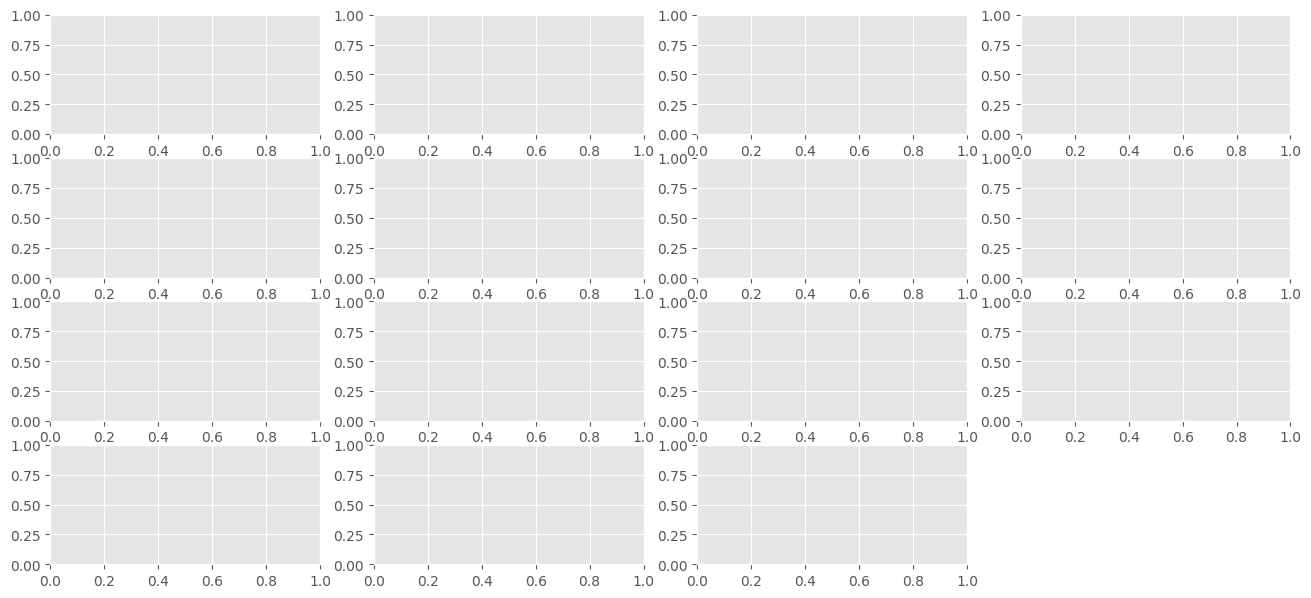

In [43]:
#Viendo la distribucion de las columnas numericas
df.hist()
plt.tight_layout()
plt.show()   

<Axes: >

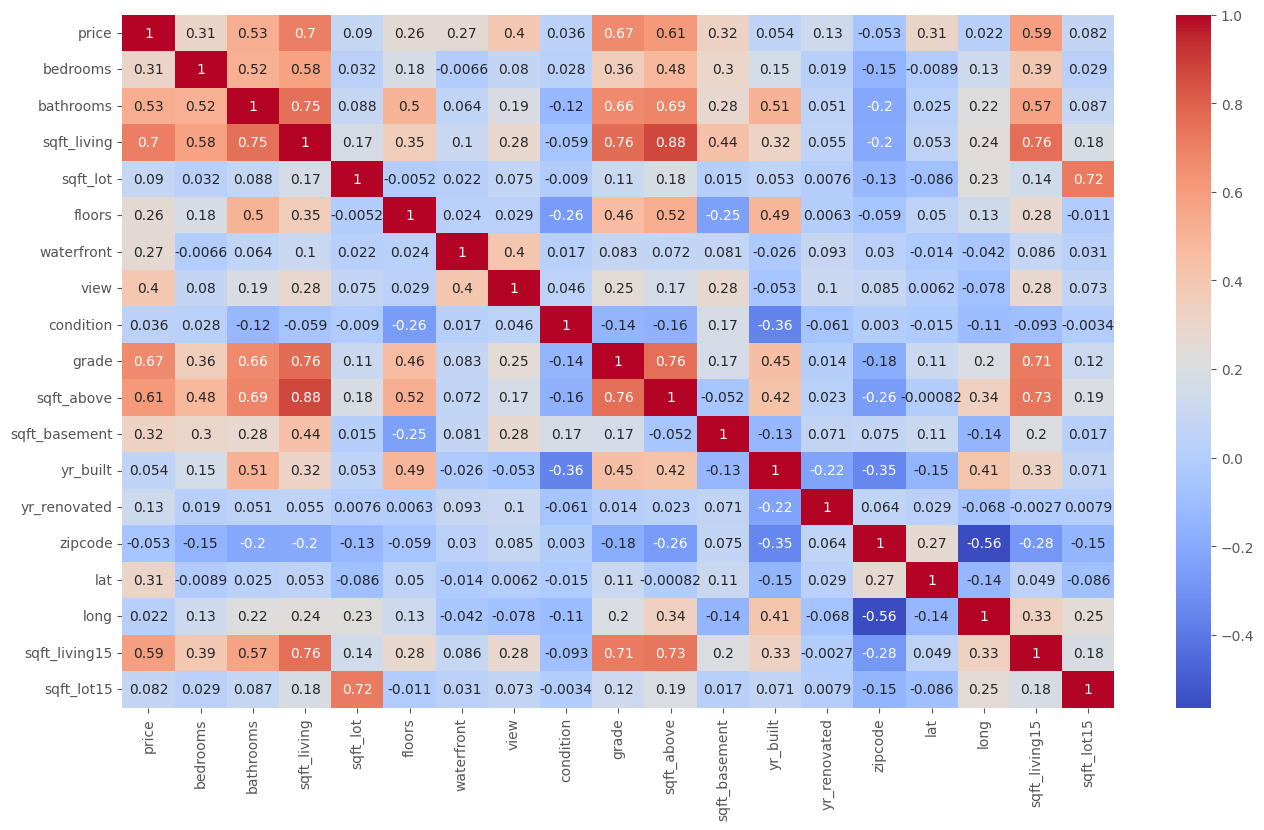

In [31]:
#Haciendo matriz de correlación
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [32]:
#Creando conjuntos de prueba, entrenamiento y validacion
X = df.drop(['price', 'yr_built', "long", "condition", "sqft_lot15", "sqft_living15"], axis=1)
y = df['price']

#Escalando los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [33]:
#Creando modelo sequencial de Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import R2Score

model = Sequential([Dense(256, input_shape=(X_train.shape[1],), activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(16, activation='relu'),
                    Dense(1, activation='linear')])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', R2Score()])
model.summary()

c:\Users\Simon R\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,361 (185.00 KB)

 Trainable params: 47,361 (185.00 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
#Entrenando modelo

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 292442144768.0000 - mae: 408254.0625 - r2_score: -1.2109 - val_loss: 43711406080.0000 - val_mae: 137065.8906 - val_r2_score: 0.6327
Epoch 2/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 45855023104.0000 - mae: 134270.4375 - r2_score: 0.6699 - val_loss: 38931312640.0000 - val_mae: 129462.1172 - val_r2_score: 0.6729
Epoch 3/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 39117451264.0000 - mae: 126078.8594 - r2_score: 0.6985 - val_loss: 38802034688.0000 - val_mae: 125156.7500 - val_r2_score: 0.6740
Epoch 4/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41458167808.0000 - mae: 127604.4219 - r2_score: 0.7099 - val_loss: 37656600576.0000 - val_mae: 123618.5469 - val_r2_score: 0.6836
Epoch 5/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 40164294656.0000 - mae: 126069.5859 - r2_score: 0.7038 - val_loss: 38523351040.0000 - val_mae: 122638.2578 - val_r2_score: 0.6763
Epoch 6/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s

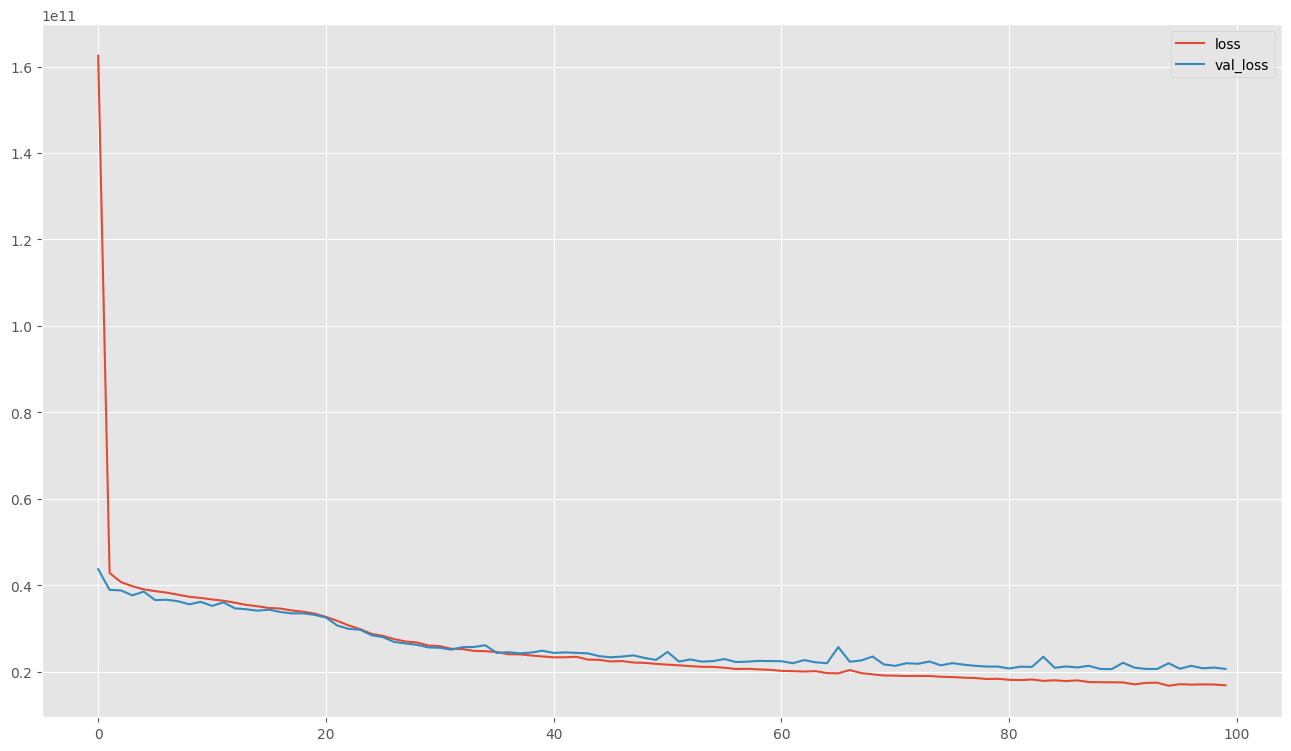

In [35]:
#Graficando el error y el R2
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()


In [36]:
#Entrenando el modelo con todos los datos de entrenamiento
model.fit(X, y, epochs=100)


Epoch 1/100
676/676 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 19880765440.0000 - mae: 83361.4531 - r2_score: 0.8536
Epoch 2/100
676/676 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18876708864.0000 - mae: 82083.4766 - r2_score: 0.8605
Epoch 3/100
676/676 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17257834496.0000 - mae: 80402.7422 - r2_score: 0.8694
Epoch 4/100
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 18339602432.0000 - mae: 81429.8125 - r2_score: 0.8620
Epoch 5/100
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 18007369728.0000 - mae: 81398.9297 - r2_score: 0.8635
Epoch 6/100
676/676 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 17308698624.0000 - mae: 79941.3359 - r2_score: 0.8643
Epoch 7/100
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 17660831744.0000 - mae: 80487.8594 - r2_score: 0.8634
Epoch 8/100
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 17457788928.0000 - mae: 80342.8672 - r2_score: 0.8690
Epoch 9/100
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 16849684480.0000 - 

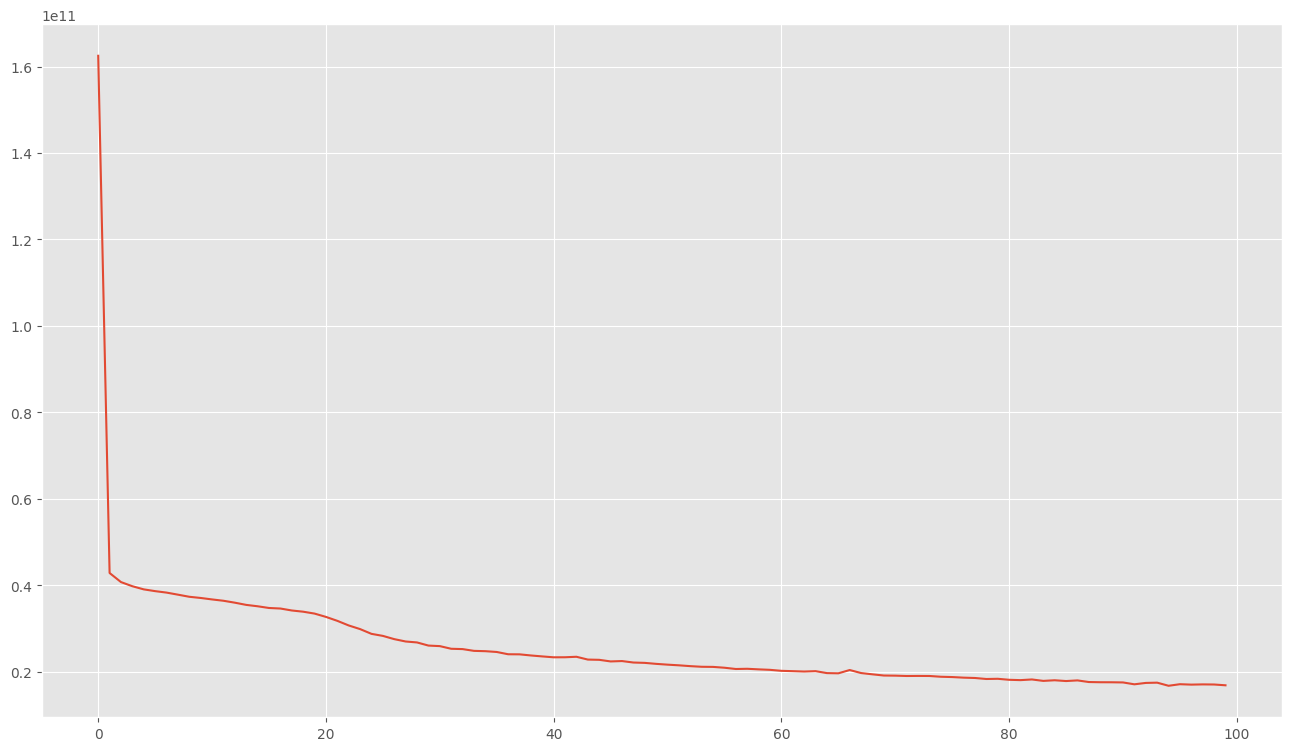

In [37]:
plt.plot(history.history['loss'])

In [44]:
#Calculando predicciones
predictions = model.predict(X_test)

#Calculando metricas de evaluacion porcentuales
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions
print('MAE: ', mae), f'(%)')
print('R2: ', r2_score(y_test, predictions))
print('RMSE: ', np.sqrt(mse))


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step
MAE:  75087.58943080615
R2:  0.9108156971872629
RMSE:  116114.55414438588
